In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:

data.drop(['CustomerID'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [4]:
dummy_data=pd.get_dummies(data['Gender'])
data=pd.concat([data,dummy_data],axis=1)
data.drop('Gender',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Female                  200 non-null    uint8
 4   Male                    200 non-null    uint8
dtypes: int64(3), uint8(2)
memory usage: 5.2 KB


In [35]:
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.decomposition import PCA
scaler = StandardScaler() 

scaled = scaler.fit_transform(data) 

normalized = normalize(scaled) 

normalized = pd.DataFrame(normalized) 

pca = PCA(n_components = 2) 
final = pca.fit_transform(normalized) 
final = pd.DataFrame(final) 
final.columns = ['C1', 'C2'] 
  
final.head()

,C1,C2
0,0.573734,-0.280407
1,0.533370,-0.576414
2,-0.385804,0.086544
3,-0.487304,-0.497296
4,-0.554609,0.017950


In [36]:
model=Birch(branching_factor =30, n_clusters = 5, threshold = 0.25)
model.fit(final)


Birch(branching_factor=30, n_clusters=5, threshold=0.25)

In [37]:
predicted=model.predict(final)

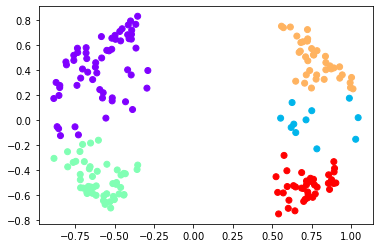

In [39]:
plt.scatter(final['C1'],final['C2'],c = model.fit_predict(final),cmap='rainbow')
plt.show()